In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
border_crossing = pd.read_csv("Datasets/Border_Crossing_Entry_Data.csv")

#Make into a DataFrame
border_crossing = pd.DataFrame(border_crossing)
border_crossing.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
#Analyzing the border on the US-Mexico Border
us_mex = border_crossing[border_crossing["Border"] == "US-Mexico Border"]
us_mex.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003)
19,San Ysidro,California,2504,US-Mexico Border,03/01/2019 12:00:00 AM,Bus Passengers,7779,POINT (-117.02666999999998 32.54306)


In [14]:
#Current means of crossing the border?
#Busiest border crossings?
#Which type of transportation is the most common?
measure = us_mex.groupby("Measure").Value.sum()
measure = pd.DataFrame(measure)

measure

,Value
Measure,
Bus Passengers,68003376
Buses,5450143
Pedestrians,1031249540
Personal Vehicle Passengers,3918732465
Personal Vehicles,1823646820
Rail Containers Empty,8788737
Rail Containers Full,7827258
Train Passengers,287853
Trains,202871


In [13]:
measure_top_6 = measure.head(6)
measure_top_6 = measure_top_6.sort_values(ascending=False)
measure_top_6 = pd.DataFrame(measure_top_6)

measure_top_6

,Value
Measure,
Personal Vehicle Passengers,3918732465
Personal Vehicles,1823646820
Pedestrians,1031249540
Bus Passengers,68003376
Rail Containers Empty,8788737
Buses,5450143


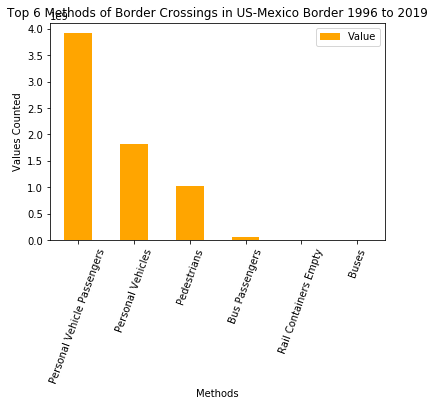

<Figure size 432x288 with 0 Axes>

In [25]:
Top_6 = measure_top_6.plot(kind="bar", color="orange", title="Top 6 Methods of Border Crossings in US-Mexico Border 1996 to 2019")

Top_6.set_xlabel("Methods")
Top_6.set_ylabel("Values Counted")

plt.xticks(rotation=70)
plt.show()
plt.tight_layout()

#plt.savefig("Visualizations/top_5_reasons.png")

#Values are 1 x 10^9 

In [32]:
#Busiest border crossings 
border_crossings = us_mex.groupby(["State", "Port Name"]).Value.sum()
border_crossings = pd.DataFrame(border_crossings)

border_crossings

Value
State      Port Name                      
Arizona    Douglas               161344421
           Lukeville              34245623
           Naco                   27793204
           Nogales               401329087
           San Luis              261048571
           Sasabe                  2314186
California Andrade                72889447
           Calexico              522234988
           Calexico East         228599481
           Cross Border Xpress     1942301
           Otay Mesa             449920446
           San Ysidro           1135400899
           Tecate                 88534154
New Mexico Columbus               33717290
           Santa Teresa           31218984
Texas      Boquillas                 50461
           Brownsville           517244510
           Del Rio               134134517
           Eagle Pass            255053686
           El Paso              1151783061
           Hidalgo               569145367
           Laredo                653682020
           Presidio               55209945
           Progreso              110454192
           Rio Grande City        53958056
           Roma                   91891388
           Tornillo-Fabens        40491763

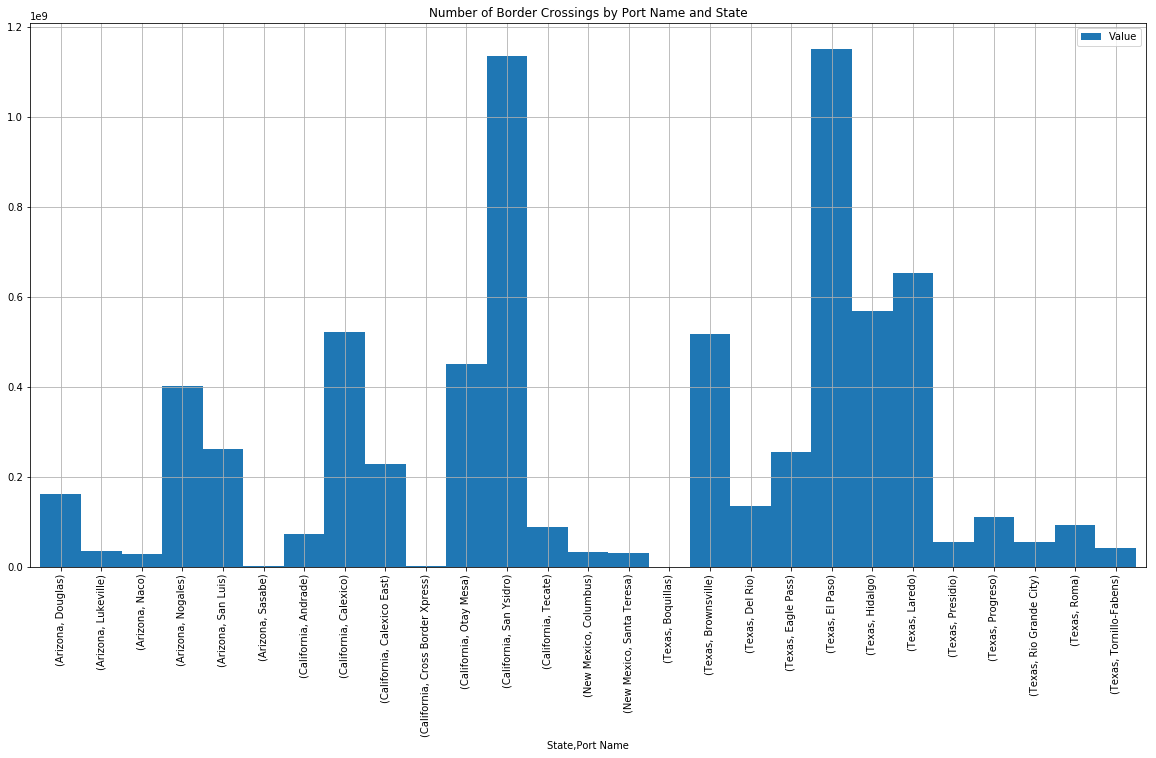

In [38]:
border_crossings.groupby(['State','Port Name']).sum().plot.bar(figsize = (20,10), width = 1)
plt.title("Number of Border Crossings by Port Name and State")

plt.grid()
plt.show()

In [41]:
#Busiest Border Crossings Among All States
busiest_crossings = us_mex.groupby("Port Name").Value.sum()
busiest_crossings_top_5 = busiest_crossings.sort_values(ascending=False)

busiest_crossings_top_5 = pd.DataFrame(busiest_crossings_top_5.head())
busiest_crossings_top_5

,Value
Port Name,
El Paso,1151783061
San Ysidro,1135400899
Laredo,653682020
Hidalgo,569145367
Calexico,522234988


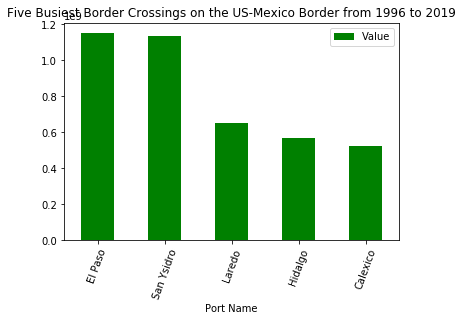

<Figure size 432x288 with 0 Axes>

In [59]:
top_5 = busiest_crossings_top_5.plot(kind="bar", color = "green")

plt.title("Five Busiest Border Crossings on the US-Mexico Border from 1996 to 2019")

plt.xticks(rotation=70)

plt.show()
plt.tight_layout()

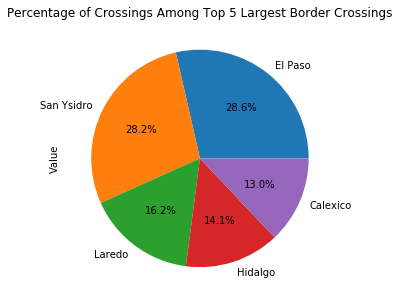

<Figure size 432x288 with 0 Axes>

In [66]:
top_5_pie = busiest_crossings_top_5.plot(kind="pie", y='Value', autopct = "%1.1f%%", figsize=(15,5), legend=None)
plt.title("Percentage of Crossings Among Top 5 Largest Border Crossings")

plt.show()
plt.tight_layout()

In [ ]:
#See the amount of traffic over time in the busiest border crossing
